In [ ]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt


2.4.1


In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train, Y_train), (x_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
x_test = x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train[0].shape)
print(y_test.shape)

(28, 28)
(10000,)


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)),
  tf.keras.layers.Dense(60,activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10, activation='softmax')
])



In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
result = model.fit(X_train, Y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4081 - accuracy: 0.8802 - val_loss: 0.1895 - val_accuracy: 0.9455
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2286 - accuracy: 0.9330 - val_loss: 0.1385 - val_accuracy: 0.9594
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1892 - accuracy: 0.9434 - val_loss: 0.1269 - val_accuracy: 0.9622
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1676 - accuracy: 0.9490 - val_loss: 0.1099 - val_accuracy: 0.9682
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1525 - accuracy: 0.9543 - val_loss: 0.1057 - val_accuracy: 0.9689
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1429 - accuracy: 0.9563 - val_loss: 0.0989 - val_accuracy: 0.9707
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1350 - accuracy: 0.9584 - val_loss: 0.0978 - val_accuracy:

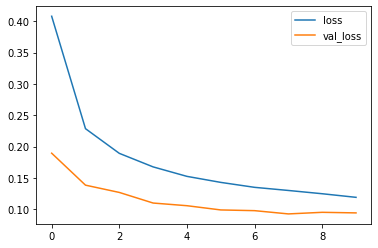

In [ ]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
result.history

{'accuracy': [0.7633000016212463,
  0.8460833430290222,
  0.8797666430473328,
  0.8920333385467529,
  0.9003833532333374,
  0.9047999978065491,
  0.9084500074386597,
  0.9127833247184753,
  0.9154166579246521,
  0.9190333485603333],
 'loss': [2.366612434387207,
  0.5917103290557861,
  0.46996042132377625,
  0.4148244261741638,
  0.38266387581825256,
  0.3763978183269501,
  0.35442736744880676,
  0.3408774435520172,
  0.3371524512767792,
  0.3256481885910034],
 'val_accuracy': [0.8815000057220459,
  0.9068999886512756,
  0.9301000237464905,
  0.9279000163078308,
  0.9300000071525574,
  0.9373000264167786,
  0.9413999915122986,
  0.9408000111579895,
  0.9442999958992004,
  0.942799985408783],
 'val_loss': [0.5589143633842468,
  0.4086354970932007,
  0.3390839993953705,
  0.31874197721481323,
  0.3064781129360199,
  0.3000389039516449,
  0.3089168965816498,
  0.292631596326828,
  0.27241435647010803,
  0.3052768409252167]}

In [ ]:
predictions = model.predict(x_test)

In [ ]:
import numpy as np
predictions[1]

array([3.9019219e-09, 3.3772138e-03, 9.9655616e-01, 6.6010958e-05,
       6.9937170e-18, 2.9638460e-07, 3.9231303e-09, 1.2953411e-12,
       3.3360237e-07, 2.6911612e-17], dtype=float32)

In [ ]:
p = np.argmax(predictions,axis=1)
p

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0942 - accuracy: 0.9733


[0.09419680386781693, 0.9732999801635742]

In [ ]:
tf.math.confusion_matrix(y_test, p)


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    2,    2,    1,    1,    3,    2,    1,    0],
       [   0, 1124,    2,    2,    0,    0,    1,    1,    5,    0],
       [   5,    1,  996,    6,    4,    0,    3,   10,    7,    0],
       [   0,    0,    6,  992,    1,    2,    0,    5,    3,    1],
       [   1,    0,    3,    0,  957,    0,    6,    1,    1,   13],
       [   2,    4,    0,   16,    1,  849,    6,    2,    6,    6],
       [   6,    3,    2,    1,    5,    3,  932,    0,    6,    0],
       [   2,    5,    7,    3,    0,    0,    0, 1006,    1,    4],
       [   4,    1,    1,    9,    5,    4,    1,    6,  939,    4],
       [   2,    6,    0,    9,   11,    1,    0,    8,    2,  970]],
      dtype=int32)>

In [ ]:
misclassified_id = np.where(y_test != p)[0]
print(misclassified_id)

[  73  151  241  247  259  321  340  381  445  582  591  610  659  691
  707  717  720  740  760  844  882  924  947  951  965 1014 1032 1044
 1112 1124 1181 1182 1226 1232 1242 1247 1252 1289 1299 1319 1326 1328
 1337 1393 1425 1500 1522 1530 1549 1553 1554 1609 1678 1681 1709 1717
 1737 1751 1754 1790 1800 1850 1878 1901 1952 2004 2024 2035 2043 2044
 2053 2098 2109 2118 2125 2130 2135 2162 2179 2182 2186 2189 2224 2272
 2291 2293 2299 2325 2329 2369 2387 2406 2422 2425 2433 2454 2462 2488
 2607 2610 2648 2654 2720 2810 2896 2927 2939 2953 2970 2995 3005 3030
 3060 3073 3117 3157 3330 3336 3405 3422 3503 3520 3549 3558 3597 3604
 3681 3718 3749 3751 3762 3776 3780 3808 3811 3838 3853 3869 3893 3902
 3906 3926 3941 3943 3976 4000 4012 4017 4065 4075 4078 4152 4163 4176
 4199 4201 4205 4212 4224 4248 4255 4289 4306 4355 4356 4374 4497 4500
 4521 4536 4547 4575 4601 4615 4731 4751 4807 4814 4823 4876 4880 4888
 4890 4956 4966 4990 5140 5331 5457 5642 5734 5735 5749 5842 5887 5888
 5913 

predicted:  3 real:  8


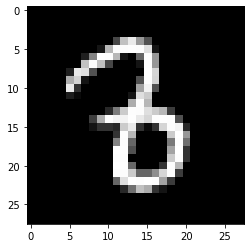

In [ ]:
i = np.random.choice(misclassified_id)
plt.imshow(x_test[i], cmap='gray')
print("predicted: ", p[i], "real: ", y_test[i])

In [ ]:
len(misclassified_id)

267